1. Linear / Naive 수식 구현
2. NLL / non-linear로 바꾸는 애들 구현
3. single input - single output (feed forward - back propagation)
4. Multiple input - single output
------------ Binary case -------------
5. Multiple Input - Multiple output
6. Multiple Input - Multiple Hidden layer - Multiple output

# conv2d

1. input image, rgb layer 3개로 나누는 것 / rgb인 얘면 쪼개는 것

2. filter, kernel / filter size에 맞춰서 window size를 결정하고 filtering한다 / padding = 공백에 넣어주는 과정

3. stride = 아래의 filter 추출 시에 얼만큼 이동할지? / 연산량을 줄이기 위한 목적

4. padding = 출력 데이터의 공간적 크기를 조절해주기 위해 사용되는 파라미터 /

zero padding 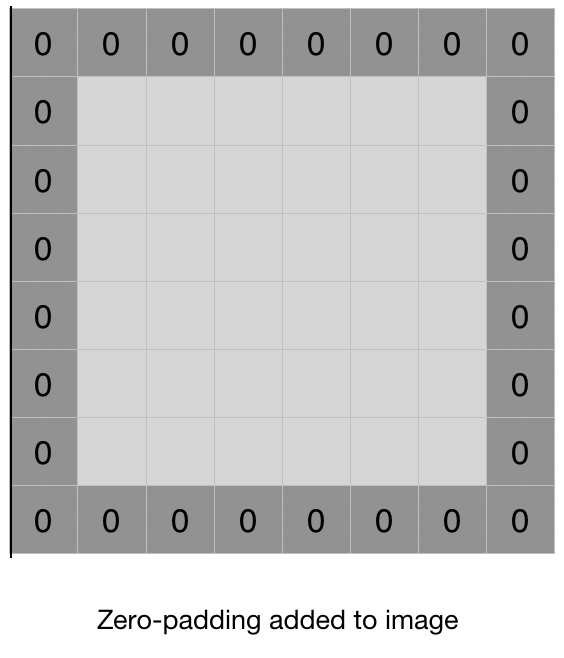
입력 데이터의 크기와 출력 데이터의 크기를 같게 해주는 목적

# CNN

conv2d / pooling 몇번 일어남 (원하는대로~)

그 후 fc layer로

이때 신경써야 하는 것은 stride 값과 size 값, 그리고 초기 w값의 세팅

filtering의 경우, 바깥의 값들 또한 sampling 해야함

pooling의 종류 - max pooling (matrix 값 내에서 stride 값에 따라서 최대값만 넣기)
               / global average pooling (하나의 matrix에서의 평균값 넣기)

padding을 사용하여 너무 작은 크기의 데이터는 키워서 사용 가능하다

to do list

1. conv2d 만들기
2. pooling 만들기
3. fc layer 만들기

In [1]:
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
# input
input = np.array([[[161, 163, 162],
                    [161, 163, 162],
                    [161, 163, 162]],
                  [[161, 163, 162],
                    [161, 163, 162],
                    [161, 163, 162]],
                  [[161, 163, 162],
                    [161, 163, 162],
                    [161, 163, 162]]])
# 3x3x3 - input

array([[[161, 163, 162],
        [161, 163, 162],
        [161, 163, 162]],

       [[161, 163, 162],
        [161, 163, 162],
        [161, 163, 162]],

       [[161, 163, 162],
        [161, 163, 162],
        [161, 163, 162]]])

In [89]:
def relu(x):
  return x if x > 0 else 0

In [90]:
# conv2d
def conv2d(input, filter, padding = 1, stride = 1):
  # input = size
  # filter = filter size (tupple)
  # padding = padding size default is 1
  # stride = default is 1

  # 1. input padding 하기
  # padding 시에는 filter size에 맞춰서 padding 해야하는 것 ㄴㄴ
  # 없을수도 있을수도
  # 2. stride에 맞춰서 추출
 output = np.array([])

 r = input[:,:,0]
 g = input[:,:,1]
 b = input[:,:,2]

 wr = np.random.rand(filter[0], filter[1])
 wg = np.random.rand(filter[0], filter[1])
 wb = np.random.rand(filter[0], filter[1])

 # padding
 padd = np.pad(r, padding, 'constant')
 # (5,5)

 # stride
 for i in range(1):
  for j in range(0, padd.shape[0], stride):
    if padd.shape[0] - j < j:
        break
    for k in range(0, padd.shape[0], stride):
      if padd.shape[0] - k < k:
        break
      else:
        # relu
        output = np.append(output, relu((wr*padd[j:filter[0]+j,k:filter[1]+k]).sum()))

 return output.reshape((int((input.shape[0]-filter[0]+2*padding)/stride+1),int((input.shape[1]-filter[1]+2*padding)/stride+1)))

print( conv2d(input, (3,3)))

[[174.29499944 289.44455756 249.42388157]
 [431.12573801 657.05798382 490.78906854]
 [406.69390962 621.14886432 463.12109432]]


5